In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("GLC_features_preprocessed.csv", parse_dates=["event_date"])

In [4]:
df.columns

Index(['event_date', 'event_title', 'event_description',
       'location_description', 'location_accuracy', 'landslide_category',
       'landslide_trigger', 'landslide_size', 'landslide_setting',
       'fatality_count', 'injury_count', 'country_name', 'admin_division_name',
       'admin_division_population', 'gazeteer_closest_point',
       'gazeteer_distance', 'longitude', 'latitude', 'tempmax', 'tempmin',
       'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipcover', 'windgust', 'windspeed', 'winddir', 'pressure',
       'cloudcover', 'visibility', 'moonphase', 'conditions', 'stations',
       'elevation', 'continent', 'season', 'treecover2000', 'loss', 'gain',
       'soil_texture_0', 'soil_texture_10', 'soil_texture_30',
       'soil_texture_60', 'soil_texture_100', 'soil_texture_200',
       'population_density_2000', 'population_density_2005',
       'population_density_2010', 'population_density_2015',
       'population_densit

In [6]:
df.country_name.value_counts()

country_name
United States           3386
India                    937
Philippines              651
Nepal                    427
China                    372
                        ... 
Cameroon                   1
Slovenia                   1
Mauritius                  1
United Arab Emirates       1
Jordan                     1
Name: count, Length: 138, dtype: int64

In [9]:
df[df.country_name == "United States"].to_csv("USA.csv", index=False)

In [4]:
import time 
import datetime
import warnings
import pandas as pd
import numpy as np
from numpy import absolute
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width = 1000
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MaxAbsScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, mean_squared_error
import joblib
import xgboost as xgb
from xgboost import XGBRegressor
from datetime import datetime
from datetime import datetime


In [5]:
def get_time_stamp(x):
    return int(time.mktime(datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').timetuple()))
def get_date_time(x):
    return datetime.fromtimestamp(x).isoformat(" ")

In [14]:
df = pd.read_csv("USA.csv", parse_dates=["event_date"])

In [15]:
df = df.sort_values("event_date")

In [16]:
df = df[["event_date", "longitude"]]

In [17]:
df["event_date"] = df["event_date"].apply(lambda x: get_time_stamp(x))

In [18]:
X_train_lon, X_test_lon, y_train_lon, y_test_lon = train_test_split(df["event_date"],df["longitude"], test_size=0.2,random_state=0)

In [19]:
regressor_lon= xgb.XGBRegressor( max_depth     = 3,
                           n_estimators  = 500,
                           learning_rate = 0.01,
                           eval_metric='rmse')

regressor_lon.fit(X_train_lon, y_train_lon)
y_pred_lon = regressor_lon.predict(X_test_lon)
rsme_lon = np.sqrt(mean_squared_error(y_test_lon,y_pred_lon))
rsme_lon

15.93376813356858

In [38]:
df = pd.read_csv("GLC_features_preprocessed.csv", parse_dates=["event_date"])

In [39]:
df.select_dtypes(exclude=np.number).columns

Index(['event_date', 'event_title', 'event_description', 'location_description', 'location_accuracy', 'landslide_category', 'landslide_trigger', 'landslide_size', 'landslide_setting', 'country_name', 'admin_division_name', 'gazeteer_closest_point', 'conditions', 'stations', 'continent', 'season', 'soil_texture_0', 'soil_texture_10', 'soil_texture_30', 'soil_texture_60', 'soil_texture_100', 'soil_texture_200'], dtype='object')

In [40]:
from sklearn.preprocessing import OrdinalEncoder

In [41]:
oc = OrdinalEncoder()
oc.fit(df).fit_transform(df)

array([[ 344., 6805., 7808., ..., 1381., 1351., 1332.],
       [ 456., 3595., 3370., ..., 6699., 6714., 6703.],
       [ 537., 1590., 5007., ..., 3131., 3050., 2876.],
       ...,
       [5199., 3667., 1751., ..., 6096., 6115., 6137.],
       [5664., 4462., 4115., ..., 3172., 3248., 3355.],
       [5520., 3461., 1043., ..., 6923., 7002., 7069.]])

In [42]:
import seaborn as sn
import matplotlib.pyplot as plt

In [43]:
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

ValueError: could not convert string to float: 'Sigou Village, Loufan County, Shanxi Province'

In [8]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width = 1000

In [4]:
df = pd.read_csv("GLC_features_preprocessed.csv", parse_dates=["event_date"])

In [6]:
df.columns

Index(['event_date', 'event_title', 'event_description',
       'location_description', 'location_accuracy', 'landslide_category',
       'landslide_trigger', 'landslide_size', 'landslide_setting',
       'fatality_count', 'injury_count', 'country_name', 'admin_division_name',
       'admin_division_population', 'gazeteer_closest_point',
       'gazeteer_distance', 'longitude', 'latitude', 'tempmax', 'tempmin',
       'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipcover', 'windgust', 'windspeed', 'winddir', 'pressure',
       'cloudcover', 'visibility', 'moonphase', 'conditions', 'stations',
       'elevation', 'continent', 'season', 'treecover2000', 'loss', 'gain',
       'soil_texture_0', 'soil_texture_10', 'soil_texture_30',
       'soil_texture_60', 'soil_texture_100', 'soil_texture_200',
       'population_density_2000', 'population_density_2005',
       'population_density_2010', 'population_density_2015',
       'population_densit

In [9]:
df.head(1)

,event_date,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,country_name,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,longitude,latitude,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,windgust,windspeed,winddir,pressure,cloudcover,visibility,moonphase,conditions,stations,elevation,continent,season,treecover2000,loss,gain,soil_texture_0,soil_texture_10,soil_texture_30,soil_texture_60,soil_texture_100,soil_texture_200,population_density_2000,population_density_2005,population_density_2010,population_density_2015,population_density_2020
0,2008-08-01,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,mine,11.0,0.0,China,Shaanxi,0,Jingyang,41.02145,107.45,32.5625,31.2,24.5,27.3,32.6,24.5,28.2,20.3,66.5,0.0,0.0,50.955865,8.3,230.4,1006.9,63.1,17.2,0.0,Partially cloudy,"['57237099999', '57127099999']",709.0,Asia,summer,0,0.0,0,Lo,Lo,Lo,Lo,ClLo,ClLo,10.897663,10.860593,10.777864,10.649446,10.41667


In [5]:
df["treecover2000"]

0        0
1        0
2        0
3        0
4        0
        ..
9340    49
9341     0
9342     0
9343     0
9344     0
Name: treecover2000, Length: 9345, dtype: int64

In [36]:
df = pd.read_csv("data.csv", parse_dates= ["event_date"])
df[["event_date","longitude","latitude", "treecover2000", "landslide_size"]].to_csv("tree.csv", index = False)

In [11]:
df[["event_date","longitude","latitude", "elevation"]].to_csv("elevation.csv", index = False)

In [12]:
df[["event_date","longitude","latitude", "population_density_2015"]].to_csv("population.csv", index = False)

In [26]:
df[["event_date","longitude","latitude", "precipcover"]].to_csv("precipcover.csv", index = False)

In [25]:
df[["event_date","longitude","latitude", "landslide_size"]].to_csv("landslide_size.csv", index = False)

In [14]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'event_date', 'event_title', 'event_description', 'location_description', 'location_accuracy', 'landslide_category', 'landslide_trigger', 'landslide_size', 'landslide_setting', 'fatality_count', 'injury_count', 'country_name', 'admin_division_name', 'admin_division_population', 'gazeteer_closest_point', 'gazeteer_distance', 'longitude', 'latitude', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipcover', 'windgust', 'windspeed', 'winddir', 'pressure', 'cloudcover', 'visibility', 'moonphase', 'conditions', 'stations', 'elevation', 'continent', 'season', 'treecover2000', 'loss', 'gain', 'soil_texture_0', 'soil_texture_10', 'soil_texture_30', 'soil_texture_60', 'soil_texture_100', 'soil_texture_200', 'population_density_2000', 'population_density_2005', 'population_density_2010', 'population_density_2015', 'population_density_2020'], dtype='object')

In [16]:
df[["event_date","longitude","latitude", "humidity"]].to_csv("humidity.csv", index = False)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

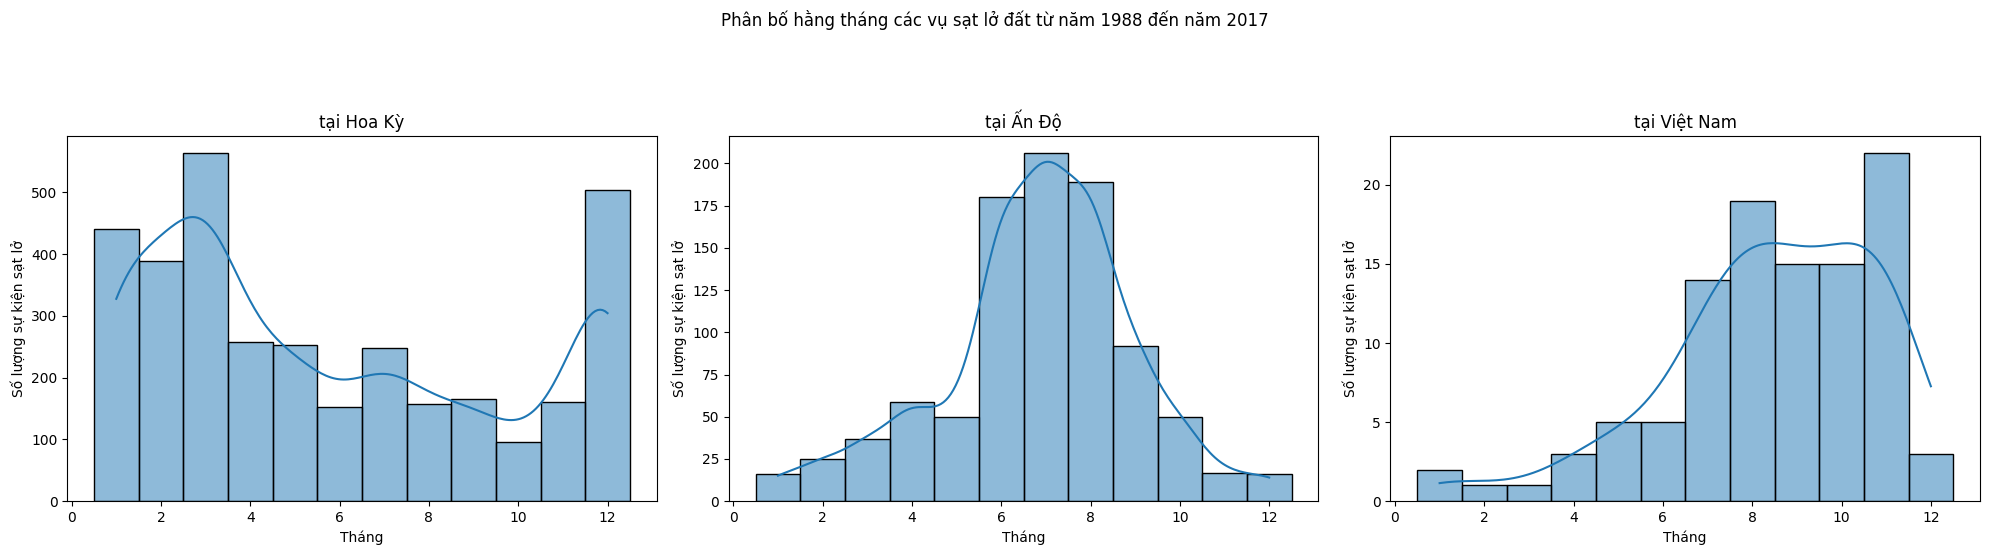

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

bins = np.arange(13) + 0.5

df_country_US = df.loc[lambda df: df['country_name'] == 'United States', :].loc[:, ['country_name', 'event_date']]
month_country_US = df_country_US['event_date'].dt.month

df_country_India = df.loc[lambda df: df['country_name'] == 'India', :].loc[:, ['country_name', 'event_date']]
month_country_India = df_country_India['event_date'].dt.month

df_country_Vietnam = df.loc[lambda df: df['country_name'] == 'Vietnam', :].loc[:, ['country_name', 'event_date']]
month_country_Vietnam = df_country_Vietnam['event_date'].dt.month

sns.histplot(x=month_country_US, kde=True, bins=bins, ax=ax[0]).set(title='tại Hoa Kỳ', xlabel='Tháng', ylabel='Số lượng sự kiện sạt lở')
sns.histplot(x=month_country_India, kde=True, bins=bins, ax=ax[1]).set(title='tại Ấn Độ', xlabel='Tháng', ylabel='Số lượng sự kiện sạt lở')
sns.histplot(x=month_country_Vietnam, kde=True, bins=bins, ax=ax[2]).set(title='tại Việt Nam', xlabel='Tháng', ylabel='Số lượng sự kiện sạt lở')
plt.suptitle("Phân bố hằng tháng các vụ sạt lở đất từ năm 1988 đến năm 2017", x=0.5, y=1.1)
fig.tight_layout()
plt.show()


In [29]:
import ee

In [35]:
ee.Authenticate()
ee.Initialize(project='test')

EEException: Cannot authenticate: Invalid request.

In [ ]:
dataset = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY').filter(
    ee.Filter.date('2018-05-01', '2018-05-03')
)
precipitation = dataset.select('precipitation')
precipitation_vis = {
    'min': 1,
    'max': 17,
    'palette': ['001137', '0aab1e', 'e7eb05', 'ff4a2d', 'e90000'],
}

m = geemap.Map()
m.set_center(17.93, 7.71, 2)
m.add_layer(precipitation, precipitation_vis, 'Precipitation')
m

EEException: Earth Engine client library not initialized. Run `ee.Initialize()`

In [1]:
import pandas as pd


In [3]:
df =pd.read_csv("data.csv", parse_dates= ["event_date"])

In [4]:
df.landslide_size.value_counts()

landslide_size
medium          5368
small           2522
unknown          783
large            589
very_large        81
catastrophic       2
Name: count, dtype: int64

In [5]:
df.landslide_size.replace("unknown", 0, inplace=True)
df.landslide_size.replace("small", 1, inplace=True)
df.landslide_size.replace("medium", 2, inplace=True)
df.landslide_size.replace("large", 3, inplace=True)
df.landslide_size.replace("very_large", 4, inplace=True)
df.landslide_size.replace("catastrophic", 5, inplace=True)


In [6]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'event_date', 'event_title',
       'event_description', 'location_description', 'location_accuracy',
       'landslide_category', 'landslide_trigger', 'landslide_size',
       'landslide_setting', 'fatality_count', 'injury_count', 'country_name',
       'admin_division_name', 'admin_division_population',
       'gazeteer_closest_point', 'gazeteer_distance', 'longitude', 'latitude',
       'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipcover', 'windgust',
       'windspeed', 'winddir', 'pressure', 'cloudcover', 'visibility',
       'moonphase', 'conditions', 'stations', 'elevation', 'continent',
       'season', 'treecover2000', 'loss', 'gain', 'soil_texture_0',
       'soil_texture_10', 'soil_texture_30', 'soil_texture_60',
       'soil_texture_100', 'soil_texture_200', 'population_density_2000',
       'population_density_2005', 'population_density_2010',
       'population_den

In [7]:
df[["event_date","longitude","latitude", "landslide_size"]].to_csv("landslide_size.csv", index = False)